# **Assignment 1: Random Number Generation**

Random numbers are fundamental to various AI processes, from initializing weights in neural networks to providing starting points for diffusion models. They play a crucial role in ensuring variability and unpredictability in algorithms.

In this assignment, we will explore how random numbers are generated and how they can be visualized. The goals of the assignment are as follows:

- Generate random numbers by sampling from univariate and multi-variate Gaussian distribution.
- Visualize the generated numbers to understand their distribution and patterns.

**Guidelines**


1.   Try your best to avoid using ChatGPT. The assignment is simple and can be done fairly quickly with ChatGPT. Try reading and researching. The effort helps in building intuition
2.   As always, please resepct the honor code
3.   Submit your assignment in google colab file in the format `assignment-01-registration-number.ipynb`

1.   List item
2.   List item


3.   Bonus Marks: You can push your code to github and clone it here



**Helpful Material**


*   [Random Number Generator: How Do Computers Generate Random Numbers?](https://www.freecodecamp.org/news/random-number-generator/)
*   [Linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)
*   [Random number generation](https://en.wikipedia.org/wiki/Random_number_generation)
*   [Box muller transform](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)




### 1. Generating Random Numbers

In this assignment, you will create functions to generate random numbers for 1D and 2D arrays. Develop two functions: one for 1D arrays and another for 2D arrays, each with specified mean and variance.

**Instructions:**

1. **Random Number Generation:**
   - Use numpy to generate random integers.
   - Implement a Gaussian number generator using the Box-Muller transform. The function should take mean, standard deviation, and count as inputs.
   - Implement a multivariate Gaussian generator. The function should take a mean vector, covariance matrix, and count as inputs.

2. **Implementation Details:**
   - Feel free to create additional helper functions or classes if needed.
   - Include error handling for invalid inputs, such as negative mean or variance.
   - You can use numpy and other libraries for efficient computation but not their built-in random number generators

In [16]:
import numpy as np
import math
from typing import List, Tuple

class RNG:

    def __init__(self, seed: int = 1):
        """
        Initialize the Linear Congruential Generator (LCG) with a seed.
        """
        # Multiplier
        self.a = 1664525
        # Increment
        self.c = 1013904223
        # Modulus (32-bit integer)
        self.m = 2**32
        # Random Seed value
        self.state = seed

    def lcg(self) -> float:

        #  (LCG) to produce a pseudo-random number in [0, 1).

        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m

    @staticmethod
    def box_muller(lcg_func) -> Tuple[float, float]:

        u1 = lcg_func()
        u2 = lcg_func()
        z0 = math.sqrt(-2.0 * math.log(u1)) * math.cos(2 * math.pi * u2)
        z1 = math.sqrt(-2.0 * math.log(u1)) * math.sin(2 * math.pi * u2)

        return z0, z1

    def uniform_1d(self, count: int) -> np.ndarray:

        return np.array([self.lcg() for _ in range(count)])

    def uniform_2d(self, shape: Tuple[int, int]) -> np.ndarray:

        count = shape[0] * shape[1]
        return self.uniform_1d(count).reshape(shape)

    def gaussian_1d(self, count: int, mean: float = 0, std_dev: float = 1) -> np.ndarray:

        samples = []

        # Generate pairs of Gaussian random numbers
        for _ in range(count // 2):
            z0, z1 = self.box_muller(self.lcg)
            samples.append(mean + z0 * std_dev)
            samples.append(mean + z1 * std_dev)

        # If the count is odd, generate one more sample
        if count % 2 == 1:
            z0, _ = self.box_muller(self.lcg)
            samples.append(mean + z0 * std_dev)

        return np.array(samples)

    def gaussian_2d(self, shape: Tuple[int, int], mean: float = 0, std_dev: float = 1) -> np.ndarray:

        count = shape[0] * shape[1]
        samples = self.gaussian_1d(count, mean, std_dev)
        return samples.reshape(shape)

    def mv_gaussian_1d(self, mean_vec: List[float], cov_matrix: List[List[float]], count: int) -> np.ndarray:

        mean_vec = np.array(mean_vec)
        cov_matrix = np.array(cov_matrix)

        # Perform Cholesky decomposition
        L = np.linalg.cholesky(cov_matrix)

        # Generate standard normal random samples using LCG-based Box-Muller
        dim = len(mean_vec)
        standard_normal_samples = np.array([self.gaussian_1d(dim) for _ in range(count)])

        # Apply transformation: samples = L * z + mean
        transformed_samples = standard_normal_samples @ L.T + mean_vec

        return transformed_samples

    def mv_gaussian_2d(self, mean_vec: List[float], cov_matrix: List[List[float]], shape: Tuple[int, int]) -> np.ndarray:

        count = shape[0] * shape[1]
        mv_samples = self.mv_gaussian_1d(mean_vec, cov_matrix, count)
        return mv_samples.reshape(shape + (len(mean_vec),))



In [3]:

rng = RNG(seed=32)

# 1D Uniform
uniform_1d = rng.uniform_1d(10)
print("1D Uniform Random Numbers:\n", uniform_1d)

# 2D Uniform
uniform_2d = rng.uniform_2d((2, 2))
print("2D Uniform Random Numbers:\n", uniform_2d)



1D Uniform Random Numbers:
 [0.24846965 0.18108739 0.73019847 0.85239061 0.71099762 0.54855523
 0.13691096 0.95693039 0.78666237 0.42014934]
2D Uniform Random Numbers:
 [[0.31594624 0.65155503]
 [0.87338857 0.34327996]]


In [4]:
# 1D Gaussian
gaussian_1d_samples = rng.gaussian_1d(10, mean=0, std_dev=1)
print("1D Gaussian Samples:\n", gaussian_1d_samples)

# 2D Gaussian
gaussian_2d_samples = rng.gaussian_2d((2, 3), mean=0, std_dev=1)
print("2D Gaussian Samples:\n", gaussian_2d_samples)



1D Gaussian Samples:
 [-1.3779034   0.6505304   0.29650409 -0.9513417   0.35236569  0.04825684
 -0.89491224 -0.30469036 -0.55495715 -0.14947031]
2D Gaussian Samples:
 [[-0.59509996  0.41329047  1.03599362]
 [ 1.60210467  1.07510544 -0.91725885]]


In [5]:

# Multivariate Gaussian 1D
mean_vector = [0, 0]
cov_matrix = [[1, 0.5], [0.5, 1]]
mv_gaussian_1d_samples = rng.mv_gaussian_1d(mean_vector, cov_matrix, 10)
print("Multivariate Gaussian 1D Samples:\n", mv_gaussian_1d_samples)

# Multivariate Gaussian 2D
mv_gaussian_2d_samples = rng.mv_gaussian_2d(mean_vector, cov_matrix, (2, 3))
print("Multivariate Gaussian 2D Samples:\n", mv_gaussian_2d_samples)


Multivariate Gaussian 1D Samples:
 [[ 1.95274305  0.82793071]
 [ 0.35349644 -1.35438088]
 [ 0.4753631   0.82948488]
 [-2.76788129 -1.02560834]
 [-0.01728688  0.68289877]
 [-0.85236285 -0.68394842]
 [-0.82531554 -1.13559151]
 [ 0.87965642  1.31399755]
 [ 0.30705318  0.66939697]
 [ 0.35885488 -0.2566889 ]]
Multivariate Gaussian 2D Samples:
 [[[-0.72231146 -1.56626733]
  [-1.11916807 -0.32108219]
  [ 0.17995294 -1.06145881]]

 [[-1.47508029 -1.12917127]
  [ 0.43385543  0.62116713]
  [-0.07575007 -0.49650598]]]


### 2. Generating and Visualizing Random Numbers

In this part of the assignment, you will use the functions you've created to generate random numbers and then visualize the results. This will help you understand the distribution and characteristics of the generated numbers more effectively.

**Guidelines:**

1. **Visualize the Results:**
   - Use the above functions to visualize the following
      - Uniform Distribution
      - 1d Guassian Distribution
      - 2d Gaussian Distribution

3. **Implementation Details:**
   - Use libraries such as `matplotlib` and `seaborn` for visualization. Make sure to include appropriate labels and titles to make your plots informative.

In [6]:
## Visualize the numbers
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Text(0, 0.5, 'Frequency')

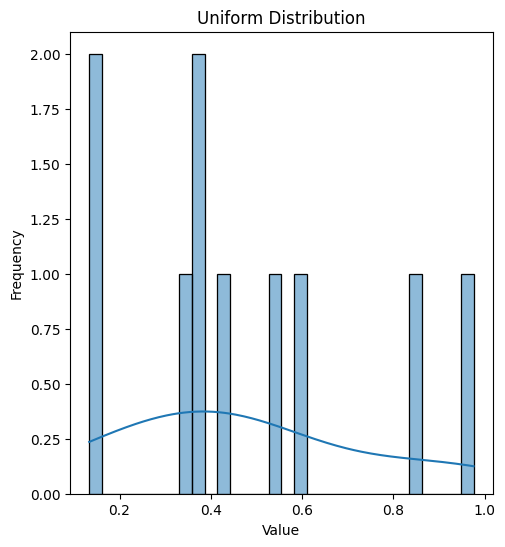

In [7]:


# Generate random samples
uniform_samples = rng.uniform_1d(10)


# Visualization of Uniform and 1D Gaussian Distributions using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Adjusted to 1 row, 2 columns, first plot
sns.histplot(uniform_samples, bins=30, kde=True)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


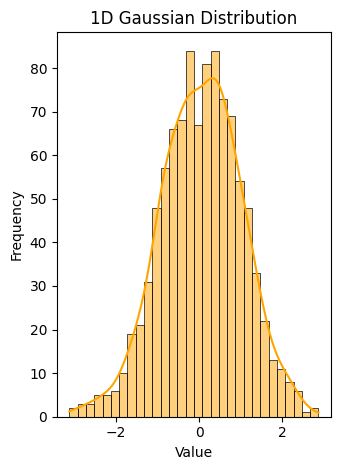

In [8]:
gaussian_1d_samples = rng.gaussian_1d(1000, mean=0, std_dev=1)

plt.subplot(1, 2, 2)  # Adjusted to 1 row, 2 columns, second plot
sns.histplot(gaussian_1d_samples, bins=30, kde=True, color='orange')
plt.title('1D Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [9]:

gaussian_2d_samples = rng.gaussian_2d((100, 2), mean=0, std_dev=1)

# Visualization of 2D Gaussian Distribution using Plotly
fig = px.scatter(x=gaussian_2d_samples[:, 0], y=gaussian_2d_samples[:, 1],
                 title='2D Gaussian Distribution',
                 labels={'x': 'X-axis', 'y': 'Y-axis'})
fig.update_traces(marker=dict(size=5, opacity=0.5))
fig.show()

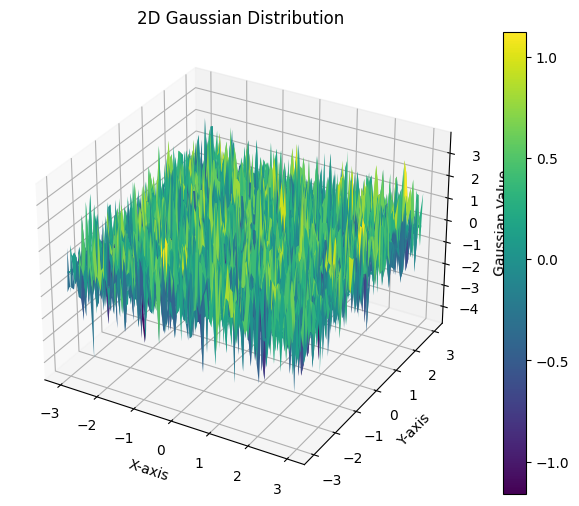

In [14]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Generate 2D Gaussian samples using your custom RNG
mean = 0
std_dev = 1
shape = (100, 100)  # 100x100 grid for 2D Gaussian
gaussian_2d_samples = rng.gaussian_2d(shape, mean=mean, std_dev=std_dev)

# Create a meshgrid for surface plot
x = np.linspace(-3, 3, shape[0])
y = np.linspace(-3, 3, shape[1])
X, Y = np.meshgrid(x, y)

# Reshape the Gaussian samples into a Z array
Z = gaussian_2d_samples

# Plot the 3D surface with contour at the base
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot with color map and no edges
surface = ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none')

# Contour plot at z=0
ax.contour(X, Y, Z, zdir='z', offset=-0.1, cmap=cm.viridis)

# Add color bar for reference
fig.colorbar(surface)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Gaussian Value')
ax.set_title('2D Gaussian Distribution')

# Show plot
plt.show()
